# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux_One/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.1599999964237213


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
env_info = env.reset(train_mode=True)[brain_name]

### 5. DDPG Algorithms
Implement the DDPG Algorithms

### 1. In this experiment we adding the Noise decay =0.999. First try with 500 episode and time step 5000

Episode 100	Average Score: 2.97
Episode 200	Average Score: 4.17
Episode 300	Average Score: 5.14
Episode 400	Average Score: 5.77
Episode 500	Average Score: 4.73


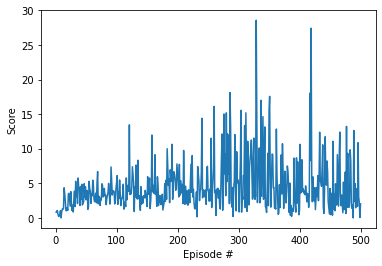

In [9]:
from DDPG_AGENT import Agent
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128       # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 3e-4         # learning rate of the actor 
LR_CRITIC = 3e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
NOISE_DECAY =0.999       # Noise decay
agent = Agent(state_size=33, action_size=4, random_seed=0,buffer_size=BUFFER_SIZE ,batch_size=BATCH_SIZE, gamma=GAMMA, tau=TAU, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC, weight_decay=WEIGHT_DECAY, noise_decay=NOISE_DECAY)

def ddpg(n_episodes=500, max_t=5000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    score_final = []
    for i_episode in range(1, n_episodes+1):
        agent.noise.reset() # Reset the OU Noise
        state = env.reset(train_mode=True)[brain_name].vector_observations[0]           # get the current state (for 1 agent)
        score = 0                                  # initialize the score (for 1 agent)
        for t in range(max_t):
            action = agent.act(state)
            
            env_info = env.step(action)[brain_name]           # send all actions to the environment
            next_state = env_info.vector_observations[0]      # get next state (for 1 agent)
            reward = env_info.rewards[0]                         # get reward (for 1 agent)
            done = env_info.local_done[0]                      # see if episode finished
            
            agent.step(state, action, reward, next_state, done)
            
            score += reward                        # update the score (for each agent)
            state = next_state
            if done:                                  # exit loop if episode finished
                break
         
        scores_deque.append(score)  
        score_final.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return score_final
    
points = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(points)+1), points)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

### 2. 2nd try Decrease the Learning Rate LR_ACTOR =2e-4, LR_CRITIC = 2e-4 , and Increase time steps  max_t=10000

Episode 100	Average Score: 3.79
Episode 200	Average Score: 9.99
Episode 300	Average Score: 11.69
Episode 400	Average Score: 13.99
Episode 500	Average Score: 8.956


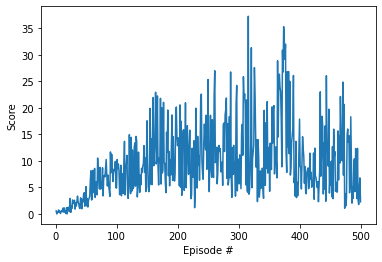

In [6]:
from DDPG_AGENT import Agent

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128       # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 2e-4         # learning rate of the actor 
LR_CRITIC = 2e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
NOISE_DECAY =0.999       # Noise decay
agent = Agent(state_size=33, action_size=4, random_seed=0,buffer_size=BUFFER_SIZE ,batch_size=BATCH_SIZE, gamma=GAMMA, tau=TAU, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC, weight_decay=WEIGHT_DECAY, noise_decay=NOISE_DECAY)

def ddpg(n_episodes=500, max_t=10000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    score_final = []
    for i_episode in range(1, n_episodes+1):
        agent.noise.reset() # Reset the OU Noise
        state = env.reset(train_mode=True)[brain_name].vector_observations[0]           # get the current state (for 1 agent)
        score = 0                                  # initialize the score (for 1 agent)
        for t in range(max_t):
            action = agent.act(state)
            
            env_info = env.step(action)[brain_name]           # send all actions to the environment
            next_state = env_info.vector_observations[0]      # get next state (for 1 agent)
            reward = env_info.rewards[0]                         # get reward (for 1 agent)
            done = env_info.local_done[0]                      # see if episode finished
            
            agent.step(state, action, reward, next_state, done)
            
            score += reward                        # update the score (for each agent)
            state = next_state
            if done:                                  # exit loop if episode finished
                break
         
        scores_deque.append(score)  
        score_final.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return score_final
    
points = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(points)+1), points)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 3. 3rd try increase time step max_t=50000.

Episode 100	Average Score: 3.94
Episode 200	Average Score: 5.26
Episode 300	Average Score: 6.07
Episode 400	Average Score: 4.91
Episode 500	Average Score: 4.66


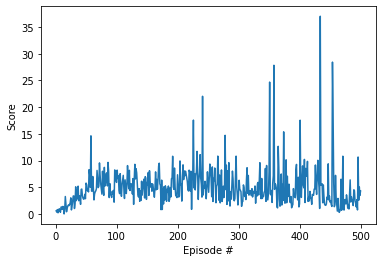

In [7]:
from DDPG_AGENT import Agent

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128       # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 2e-4         # learning rate of the actor 
LR_CRITIC = 2e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
NOISE_DECAY =0.999       # Noise decay
agent = Agent(state_size=33, action_size=4, random_seed=0,buffer_size=BUFFER_SIZE ,batch_size=BATCH_SIZE, gamma=GAMMA, tau=TAU, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC, weight_decay=WEIGHT_DECAY, noise_decay=NOISE_DECAY)

def ddpg(n_episodes=500, max_t=50000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    score_final = []
    for i_episode in range(1, n_episodes+1):
        agent.noise.reset() # Reset the OU Noise
        state = env.reset(train_mode=True)[brain_name].vector_observations[0]           # get the current state (for 1 agent)
        score = 0                                  # initialize the score (for 1 agent)
        for t in range(max_t):
            action = agent.act(state)
            
            env_info = env.step(action)[brain_name]           # send all actions to the environment
            next_state = env_info.vector_observations[0]      # get next state (for 1 agent)
            reward = env_info.rewards[0]                         # get reward (for 1 agent)
            done = env_info.local_done[0]                      # see if episode finished
            
            agent.step(state, action, reward, next_state, done)
            
            score += reward                        # update the score (for each agent)
            state = next_state
            if done:                                  # exit loop if episode finished
                break
         
        scores_deque.append(score)  
        score_final.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return score_final
    
points = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(points)+1), points)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. In the Last experiment all time steps not effect to the scores. 4nd try with 500 episode and time step max_t=1000. We increase Learning Rate of Actor= 4e-4 and Critic = 4e-4

Episode 100	Average Score: 3.53
Episode 200	Average Score: 5.18
Episode 300	Average Score: 8.29
Episode 400	Average Score: 11.04
Episode 500	Average Score: 15.06


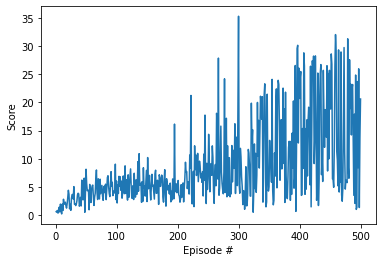

In [8]:
from DDPG_AGENT import Agent

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128       # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 4e-4         # learning rate of the actor 
LR_CRITIC = 4e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
NOISE_DECAY =0.999       # Noise decay
agent = Agent(state_size=33, action_size=4, random_seed=0,buffer_size=BUFFER_SIZE ,batch_size=BATCH_SIZE, gamma=GAMMA, tau=TAU, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC, weight_decay=WEIGHT_DECAY, noise_decay=NOISE_DECAY)

def ddpg(n_episodes=500, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    score_final = []
    for i_episode in range(1, n_episodes+1):
        agent.noise.reset() # Reset the OU Noise
        state = env.reset(train_mode=True)[brain_name].vector_observations[0]           # get the current state (for 1 agent)
        score = 0                                  # initialize the score (for 1 agent)
        for t in range(max_t):
            action = agent.act(state)
            
            env_info = env.step(action)[brain_name]           # send all actions to the environment
            next_state = env_info.vector_observations[0]      # get next state (for 1 agent)
            reward = env_info.rewards[0]                         # get reward (for 1 agent)
            done = env_info.local_done[0]                      # see if episode finished
            
            agent.step(state, action, reward, next_state, done)
            
            score += reward                        # update the score (for each agent)
            state = next_state
            if done:                                  # exit loop if episode finished
                break
         
        scores_deque.append(score)  
        score_final.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return score_final
    
points = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(points)+1), points)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

###  5. 5nd try with 500 episode and time step 1000 & Increase Buffer_size =1e6, Decrease Gamma=0.98 . Increase n_episodes=3000. Remaining Lr_actor =4e-4, lr_critic=4e-4. We got the best result.

Episode 100	Average Score: 7.72
Episode 194	Average Score: 30.10
Environment solved in 194 episodes!	Average Score: 30.10


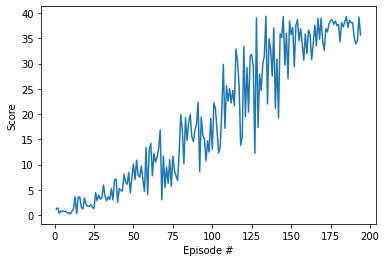

In [6]:
from DDPG_AGENT import Agent

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 128       # minibatch size
GAMMA = 0.98            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 4e-4         # learning rate of the actor 
LR_CRITIC = 4e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
NOISE_DECAY =0.999       # Noise decay
agent = Agent(state_size=33, action_size=4, random_seed=0,buffer_size=BUFFER_SIZE ,batch_size=BATCH_SIZE, gamma=GAMMA, tau=TAU, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC, weight_decay=WEIGHT_DECAY, noise_decay=NOISE_DECAY)

def ddpg(n_episodes=3000, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    score_final = []
    for i_episode in range(1, n_episodes+1):
        agent.noise.reset() # Reset the OU Noise
        state = env.reset(train_mode=True)[brain_name].vector_observations[0]           # get the current state (for 1 agent)
        score = 0                                  # initialize the score (for 1 agent)
        for t in range(max_t):
            action = agent.act(state)
            
            env_info = env.step(action)[brain_name]           # send all actions to the environment
            next_state = env_info.vector_observations[0]      # get next state (for 1 agent)
            reward = env_info.rewards[0]                         # get reward (for 1 agent)
            done = env_info.local_done[0]                      # see if episode finished
            
            agent.step(state, action, reward, next_state, done)
            
            score += reward                        # update the score (for each agent)
            state = next_state
            if done:                                  # exit loop if episode finished
                break
         
        scores_deque.append(score)  
        score_final.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return score_final
    
points = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(points)+1), points)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 6. 6th maintain most parameters in the step 5. Just increase learning rate = 5e-4 and reduce n_episodes =1000. We solved problem in 736 episodes.

Episode 100	Average Score: 2.89
Episode 200	Average Score: 6.78
Episode 300	Average Score: 9.997
Episode 400	Average Score: 13.54
Episode 500	Average Score: 18.29
Episode 600	Average Score: 21.99
Episode 700	Average Score: 27.88
Episode 736	Average Score: 30.03
Environment solved in 736 episodes!	Average Score: 30.03


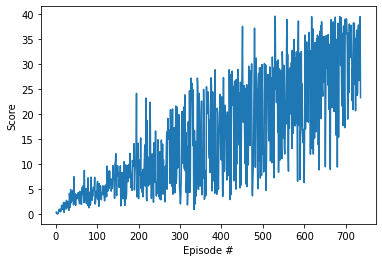

In [6]:
from DDPG_AGENT import Agent

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 128       # minibatch size
GAMMA = 0.98            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 5e-4         # learning rate of the actor 
LR_CRITIC = 5e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
NOISE_DECAY =0.999       # Noise decay
agent = Agent(state_size=33, action_size=4, random_seed=0,buffer_size=BUFFER_SIZE ,batch_size=BATCH_SIZE, gamma=GAMMA, tau=TAU, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC, weight_decay=WEIGHT_DECAY, noise_decay=NOISE_DECAY)

def ddpg(n_episodes=1000, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    score_final = []
    for i_episode in range(1, n_episodes+1):
        agent.noise.reset() # Reset the OU Noise
        state = env.reset(train_mode=True)[brain_name].vector_observations[0]           # get the current state (for 1 agent)
        score = 0                                  # initialize the score (for 1 agent)
        for t in range(max_t):
            action = agent.act(state)
            
            env_info = env.step(action)[brain_name]           # send all actions to the environment
            next_state = env_info.vector_observations[0]      # get next state (for 1 agent)
            reward = env_info.rewards[0]                         # get reward (for 1 agent)
            done = env_info.local_done[0]                      # see if episode finished
            
            agent.step(state, action, reward, next_state, done)
            
            score += reward                        # update the score (for each agent)
            state = next_state
            if done:                                  # exit loop if episode finished
                break
         
        scores_deque.append(score)  
        score_final.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return score_final
    
points = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(points)+1), points)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 7. Maintain step 6 parameter and decrease Bufer size 1e5. We can solve problem in 404 episodes

Episode 100	Average Score: 5.84
Episode 200	Average Score: 13.72
Episode 300	Average Score: 21.31
Episode 400	Average Score: 29.72
Episode 404	Average Score: 30.09
Environment solved in 404 episodes!	Average Score: 30.09


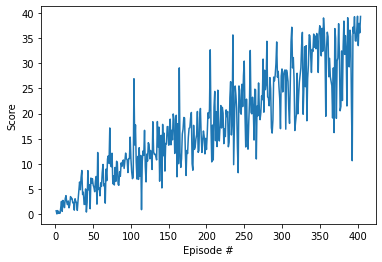

In [8]:
from DDPG_AGENT import Agent

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128       # minibatch size
GAMMA = 0.98            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 4e-4         # learning rate of the actor 
LR_CRITIC = 4e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
NOISE_DECAY =0.999       # Noise decay
agent = Agent(state_size=33, action_size=4, random_seed=0,buffer_size=BUFFER_SIZE ,batch_size=BATCH_SIZE, gamma=GAMMA, tau=TAU, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC, weight_decay=WEIGHT_DECAY, noise_decay=NOISE_DECAY)

def ddpg(n_episodes=1000, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    score_final = []
    for i_episode in range(1, n_episodes+1):
        agent.noise.reset() # Reset the OU Noise
        state = env.reset(train_mode=True)[brain_name].vector_observations[0]           # get the current state (for 1 agent)
        score = 0                                  # initialize the score (for 1 agent)
        for t in range(max_t):
            action = agent.act(state)
            
            env_info = env.step(action)[brain_name]           # send all actions to the environment
            next_state = env_info.vector_observations[0]      # get next state (for 1 agent)
            reward = env_info.rewards[0]                         # get reward (for 1 agent)
            done = env_info.local_done[0]                      # see if episode finished
            
            agent.step(state, action, reward, next_state, done)
            
            score += reward                        # update the score (for each agent)
            state = next_state
            if done:                                  # exit loop if episode finished
                break
         
        scores_deque.append(score)  
        score_final.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return score_final
    
points = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(points)+1), points)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 8. 8th try, maintain the step 7, but increase LR_CRITIC =1e-3 

Episode 100	Average Score: 3.57
Episode 200	Average Score: 3.98
Episode 300	Average Score: 2.02
Episode 400	Average Score: 1.61
Episode 500	Average Score: 1.85
Episode 600	Average Score: 1.49
Episode 700	Average Score: 1.17
Episode 800	Average Score: 0.63
Episode 900	Average Score: 0.66
Episode 1000	Average Score: 0.99


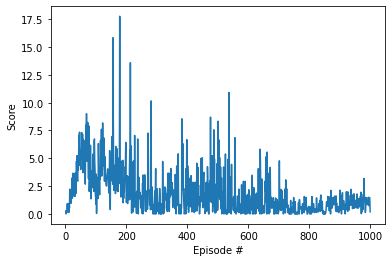

In [9]:
from DDPG_AGENT import Agent

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 128       # minibatch size
GAMMA = 0.98            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 4e-4         # learning rate of the actor 
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
NOISE_DECAY =0.999       # Noise decay
agent = Agent(state_size=33, action_size=4, random_seed=0,buffer_size=BUFFER_SIZE ,batch_size=BATCH_SIZE, gamma=GAMMA, tau=TAU, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC, weight_decay=WEIGHT_DECAY, noise_decay=NOISE_DECAY)

def ddpg(n_episodes=1000, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    score_final = []
    for i_episode in range(1, n_episodes+1):
        agent.noise.reset() # Reset the OU Noise
        state = env.reset(train_mode=True)[brain_name].vector_observations[0]           # get the current state (for 1 agent)
        score = 0                                  # initialize the score (for 1 agent)
        for t in range(max_t):
            action = agent.act(state)
            
            env_info = env.step(action)[brain_name]           # send all actions to the environment
            next_state = env_info.vector_observations[0]      # get next state (for 1 agent)
            reward = env_info.rewards[0]                         # get reward (for 1 agent)
            done = env_info.local_done[0]                      # see if episode finished
            
            agent.step(state, action, reward, next_state, done)
            
            score += reward                        # update the score (for each agent)
            state = next_state
            if done:                                  # exit loop if episode finished
                break
         
        scores_deque.append(score)  
        score_final.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return score_final
    
points = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(points)+1), points)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 9. Maintain step 5 and increase max_t = 5000

Episode 100	Average Score: 2.24
Episode 200	Average Score: 4.94
Episode 300	Average Score: 8.22
Episode 400	Average Score: 14.22
Episode 500	Average Score: 17.48
Episode 600	Average Score: 23.23
Episode 700	Average Score: 29.37
Episode 710	Average Score: 30.04
Environment solved in 710 episodes!	Average Score: 30.04


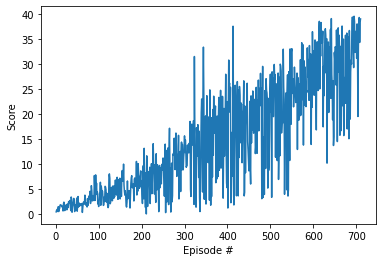

In [10]:
from DDPG_AGENT import Agent

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 128       # minibatch size
GAMMA = 0.98            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 4e-4         # learning rate of the actor 
LR_CRITIC = 4e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
NOISE_DECAY =0.999       # Noise decay
agent = Agent(state_size=33, action_size=4, random_seed=0,buffer_size=BUFFER_SIZE ,batch_size=BATCH_SIZE, gamma=GAMMA, tau=TAU, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC, weight_decay=WEIGHT_DECAY, noise_decay=NOISE_DECAY)

def ddpg(n_episodes=3000, max_t=5000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    score_final = []
    for i_episode in range(1, n_episodes+1):
        agent.noise.reset() # Reset the OU Noise
        state = env.reset(train_mode=True)[brain_name].vector_observations[0]           # get the current state (for 1 agent)
        score = 0                                  # initialize the score (for 1 agent)
        for t in range(max_t):
            action = agent.act(state)
            
            env_info = env.step(action)[brain_name]           # send all actions to the environment
            next_state = env_info.vector_observations[0]      # get next state (for 1 agent)
            reward = env_info.rewards[0]                         # get reward (for 1 agent)
            done = env_info.local_done[0]                      # see if episode finished
            
            agent.step(state, action, reward, next_state, done)
            
            score += reward                        # update the score (for each agent)
            state = next_state
            if done:                                  # exit loop if episode finished
                break
         
        scores_deque.append(score)  
        score_final.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return score_final
    
points = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(points)+1), points)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()